# Machine Learning Assignment 4

Robert Knox

## Import Statements

In [1]:
#Imports needed for this notebook
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
p
from sklearn.model_selection import GridSearchCV
#to make nice looking confusion matrices
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence

## Import Data

In [1]:
#NOTE: I manually deleted the row column
df = pd.read_excel(io="default of credit card clients.xls",sheet_name='Data',header=0)

NameError: name 'pd' is not defined

In [3]:
cleaned_df= df.dropna(how='any', axis = 0)
#check that all NA's are dropped
cleaned_df.isna().any().any()

False

In [4]:
#clean up the columns that should be category and boolean respectively
dt = {'SEX':'category',
        'EDUCATION':'category',
        'MARRIAGE':'category',
        'default payment next month':'bool'}
cleaned_df = df.astype(dt)
cleaned_df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [5]:
dfX = cleaned_df.iloc[:,0:cleaned_df.columns.size-1]
dfy = cleaned_df.iloc[:,cleaned_df.columns.size-1]
#Build train & test using sklearn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.30, random_state=42)


## Model 1 - no optimization

In [6]:
rforest1 = RandomForestClassifier()
rforest1.fit(X_train,y_train)
yhat = rforest1.predict(X_test)
yhat_probs = rforest1.predict_proba(X_test)
print('yhat:',yhat,'\nyhat_probs:',yhat_probs)

C:\Users\Bob\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


yhat: [False False False ... False False False] 
yhat_probs: [[0.7 0.3]
 [0.8 0.2]
 [0.7 0.3]
 ...
 [0.5 0.5]
 [0.8 0.2]
 [1.  0. ]]


## Model 1 Evaluation

Confusion matrix, without normalization
[[6626  414]
 [1343  617]]


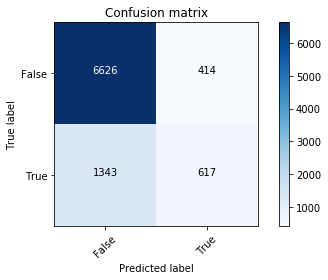

In [7]:
cm = confusion_matrix(y_test,yhat)

#helper function from http://scikit-learn.org/stable/
#auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes = ['False','True']
plot_confusion_matrix(cm,classes)

In [8]:
cr=classification_report(y_test,yhat)
print(cr)

              precision    recall  f1-score   support

       False       0.83      0.94      0.88      7040
        True       0.60      0.31      0.41      1960

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



In [10]:
# calculate roc_auc_score
# limit to probability for class = 1 (TRUE)
print(roc_auc_score(y_test, yhat_probs[:,1]))

0.7242343677527829


## Model 2 : GridSearch Optimization

In [9]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[500,750,1000,1500,2000],
'max_features':[2,4,6,8],
'max_depth':[2,4,6,8],
'random_state':[5]}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
#cv = 10, up the cross validation to 10
#n_jobs =-1, use all processors
#verbose = 5, show more messages
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 10, scoring = 'roc_auc',
                       refit = True, n_jobs=-1, verbose = 5)


In [11]:
# next, just fit this object
rf_Grid.fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min


KeyboardInterrupt: 

In [ ]:
bestparams = rf_Grid.best_params_
bestparams

In [ ]:
bestmodel = rf_Grid.best_estimator_
bestmodel

## Model 2 Evaluation

In [ ]:
y_hat_best = bestmodel.predict(X_test)
y_hat_best_proba = bestmodel.predict_proba(X_test)
cmbest = confusion_matrix(y_test,y_hat_best)
plot_confusion_matrix(cmbest,classes)

In [ ]:
crbest = classification_report(y_test,y_hat_best)
print(crbest)

In [ ]:
# calculate roc_auc_score
# limit to probability for class = 1 (TRUE)
print(roc_auc_score(y_test, y_hat_best_proba[:,1]))

## Questions

**What are the best parameters from the Grid Search?**

The best parameters were found to be:

In [ ]:
print(bestparams)

**Does the Model from #3 outperform Model #2?**

The model from #3 does outperform the Model from #2. The ROC_AUC score is 4 percent higher and both the precision and recall improved for False & True.

In [ ]:
#get the feature importance from the best model
feat_imp = bestmodel.feature_importances_
c_names = cleaned_df.columns[:len(cleaned_df.columns)-1]

In [ ]:
#function to help pull out the names from a dataframe in a sorted order
#feature_importance is a numpy array
#sorted_column_names is a list of column names in the same order as 
#feature_importance default
#returns a zip of column names & feature importance values sorted in order
def sorted_feature_importance(feature_importance,column_names):
    #turn that into an enumerated list so we know the index value of the importance
    list_feat_imp = list(enumerate(feature_importance))
    #sort our list in descending fashion
    list_feat_imp_sorted = sorted(list_feat_imp,key=lambda list_feat_imp:list_feat_imp[1],reverse=True)
    #do list comprehension to extract the value of the importance of the feature in
    feat_imp_sorted = [i[1] for i in list_feat_imp_sorted]
    #take the sorted list of features and extract their IDs
    sortednameids = [i[0] for i in list_feat_imp_sorted]
    #map the indices to the actual names from the dataframe
    sortednames = [column_names[i] for i in sortednameids]
    return zip(sortednameids,sortednames,feat_imp_sorted)

#use the helper function to get sorted features
srt_feats = sorted_feature_importance(feat_imp,c_names)
#unzip the values into lists for plotting
sorted_feat_ids,sorted_names,sorted_feat_vals = zip(*srt_feats)


## Feature Importance Plot (top 5)

In [ ]:
#needed to invert the lists for the bar chart to get the most 
#significant feature at the top
plt.barh(sorted_names[4::-1], sorted_feat_vals[4::-1])
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Best Model')
plt.show()